In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


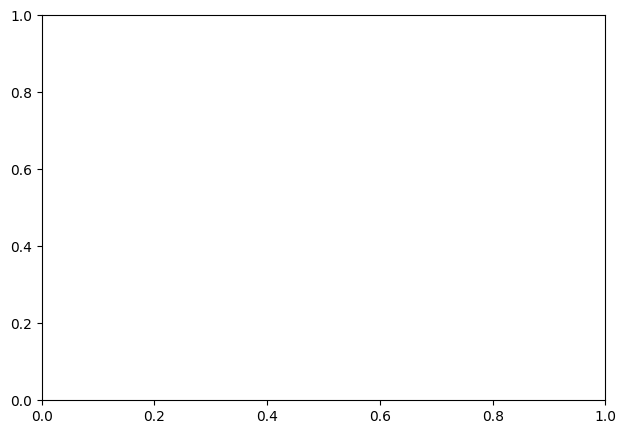

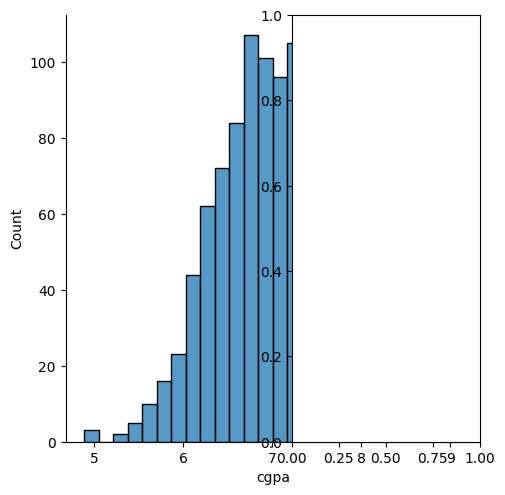

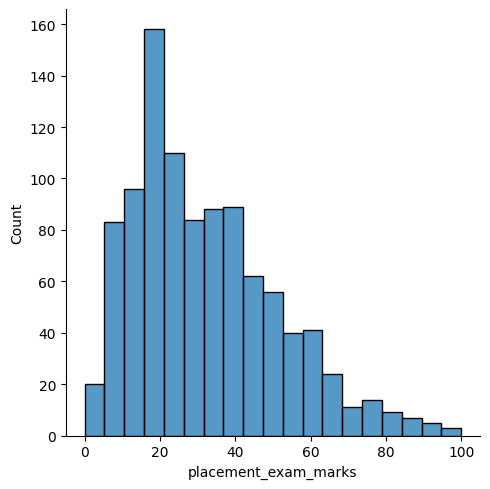

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.displot(df['cgpa'])

# plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])
plt.show()

In [16]:
print('mean of cgpa',df['cgpa'].mean())
print('std of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

mean of cgpa 6.96124
std of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [18]:
# findung boundary value
print('highest allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [23]:
# finding outlier
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]



,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# trimming

In [24]:
new_df=df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]

In [25]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# approacg 2

In [26]:
# calculate zscore

df['zsrore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [27]:
df.head()

,cgpa,placement_exam_marks,placed,zsrore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [29]:
df[df['zsrore']>3]

,cgpa,placement_exam_marks,placed,zsrore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [30]:
df[df['zsrore']<-3]

,cgpa,placement_exam_marks,placed,zsrore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [32]:
new_df=df[(df['zsrore']<3)&(df['zsrore']>-3)]

In [33]:
new_df

,cgpa,placement_exam_marks,placed,zsrore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [34]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [40]:
upper_limit,
lower_limit

np.float64(5.113546374602832)

In [35]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,upper_limit,
    np.where(
          df['cgpa']>lower_limit,lower_limit,
        df['cgpa']
    )
    
)

In [37]:
df

,cgpa,placement_exam_marks,placed,zsrore
0,5.113546,26.0,1,0.371425
1,5.113546,38.0,1,0.809810
2,5.113546,40.0,1,0.939701
3,5.113546,8.0,1,-0.878782
4,5.113546,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,4.890000,34.0,0,-3.362960
998,5.113546,46.0,1,2.693239


In [39]:
df.sample(5)

,cgpa,placement_exam_marks,placed,zsrore
266,5.113546,50.0,1,1.248194
160,5.113546,10.0,1,0.647445
59,5.113546,32.0,1,1.199485
445,5.113546,10.0,0,-2.275117
974,5.113546,38.0,0,-0.878782


In [41]:
!git init
!git remote add origin https://github.com/komalrani2404/Learn_ML
!git add outlier-removal-using-zscore.ipynb
!git commit -m "outlier-removal-using-zscore"
!git branch -M main
!git push -u origin main

Initialized empty Git repository in C:/Users/HP/.git/


[main (root-commit) a27b9e5] outlier-removal-using-zscore
 1 file changed, 1204 insertions(+)
 create mode 100644 outlier-removal-using-zscore.ipynb


To https://github.com/komalrani2404/Learn_ML
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/komalrani2404/Learn_ML'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [42]:
!git pull origin main --rebase


error: cannot pull with rebase: You have unstaged changes.
error: Please commit or stash them.
